минимум найден за 8 итераций:  -0.3948843372475546 0.7840472122154032
минимум найден за 4 итераций:  2 55.50744745996992


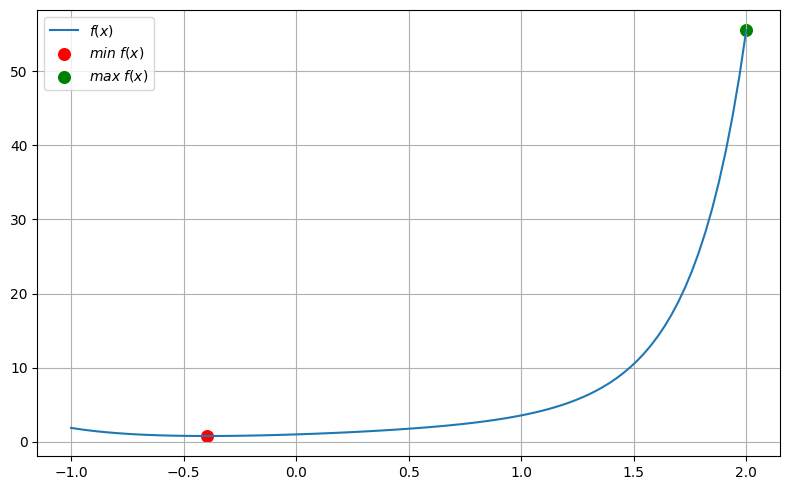

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


def deriv(func, point, eps = 1e-6):
    return (func(point + eps) - func(point - eps)) / (2 * eps)

def nwt_func(func,interval,start, eps = 1e-6, minimize: bool = True):
    (a, b), x = interval, start
    cnt = 0
    #cmt = (func(x + eps) - func(x - eps)) / (2 * eps)
    while a <= x <= b and abs( (func(x + eps) - func(x - eps)) / (2 * eps)) > eps:
        up = (func(x + eps) - func(x - eps)) / (2 * eps)
        down = (func(x + eps) - 2 * func(x) + func(x - eps)) / (eps ** 2)
        step = up / down
        x += -step if minimize else step
        cnt += 1
    x = min(b, max(a, x))
    return x, cnt
def f(x):
    return  np.sin(x) + np.exp((-x)**2)
interval = (-1 + 1e-5, 2)
minima, iter_min = nwt_func(func=f,interval=interval, start=1.5, eps=1e-6, minimize=True)
maxima, iter_max = nwt_func(func=f, interval=interval, start=1.0, eps=1e-6,  minimize=False)
right_maxima, right_iter_max = nwt_func(func=f, interval=interval, start=2.0, eps=1e-6, minimize=False)
t = np.linspace(start=interval[0], stop=interval[1], num=100)
y = f(t)
print(f"минимум найден за {iter_min} итераций: ", minima, f(minima) )
print(f"минимум найден за {iter_max} итераций: ", maxima, f(maxima))
fig, ax = plt.subplots(figsize=(8, 5))
plt.plot(t, y, label='$f(x)$')
plt.scatter(minima, f(minima),s=70,color='red',label=f'$min$ $f(x)$')
plt.scatter(maxima, f(maxima),s=70,color='green',label=f'$max$ $f(x)$')
plt.tight_layout()
plt.legend()
plt.grid()


Минимум:  2.458831787109375,  -1.1811800871984595
Погрешность 2.664446372424578e-07
Максимум0.682769775390625, 1.1811800878501988
Второй аксимум3.824371337890625, 1.1811800878501988
Погрешность 6.554789220292179e-07


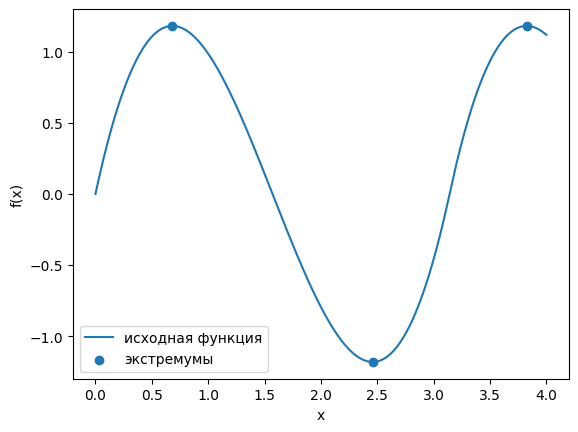

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def funct(n, x):
  result = 0
  for i in range(1, n+1):
    result += np.sin(2 * i * x) / (i**(3)- 0.4**2)
  return result

x1, x2 = 0, 4
eps = 0.0001
n = 250

x = np.linspace(0, 4, 1000)
y = [funct(n, i) for i in x]

minimum = 0.
n, a, b, tol, num = n, x1, x2, eps, 1
while (b - a) > tol:
    mid = (a + b) / 2
    if num * funct(n, mid - tol) < num * funct(n, mid + tol):
      b = mid
    else:
      a = mid
minimum = (a + b) / 2
minimum_y = funct(n, minimum)
num = -1
n, a, b, tol, num = n, x1, x2, eps, -1
maximum = 0
while (b - a) > tol:
    mid = (a + b) / 2
    if num * funct(n, mid - tol) < num * funct(n, mid + tol):
      b = mid
    else:
      a = mid
maximum = (a + b) / 2
maximum_y = funct(n, maximum)
n, a, b, tol, num = n, x1+2, x2, eps, -1
maximum1 =0
while (b - a) > tol:
    mid = (a + b) / 2
    if num * funct(n, mid - tol) < num * funct(n, mid + tol):
      b = mid
    else:
      a = mid
maximum1 = (a + b) / 2
maximum_y1 = funct(n, maximum)

print(f"Минимум:  {minimum},  {minimum_y}")
print(f"Погрешность {np.linalg.norm(minimum_y - min(y))}")
print(f"Максимум{maximum}, {maximum_y}")
print(f"Второй аксимум{maximum1}, {maximum_y1}")
print(f"Погрешность {np.linalg.norm(maximum_y - max(y))}")

extr_x = [minimum, maximum, maximum1]
extr_y = [minimum_y, maximum_y, maximum_y1]
plt.plot(x, y, label='исходная функция')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.scatter(extr_x, extr_y, label='экстремумы')
plt.legend()
plt.show()


Enter starting points in format < x y >:
0 0
миниум:  -0.2891556887230375 -0.09165180815063005
максимум:  1.0 0.9273968450137868


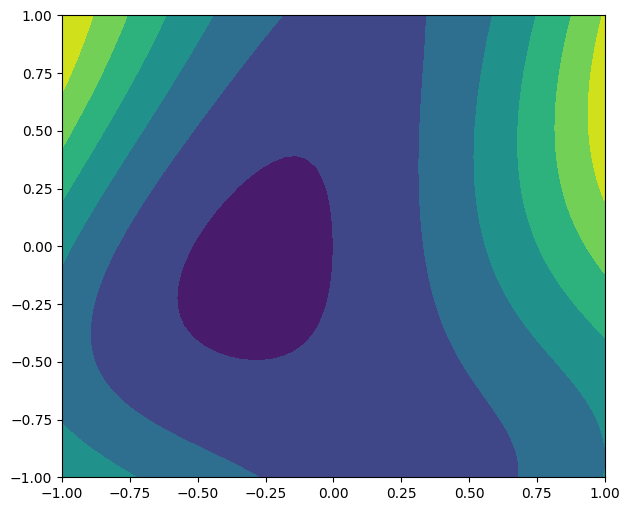

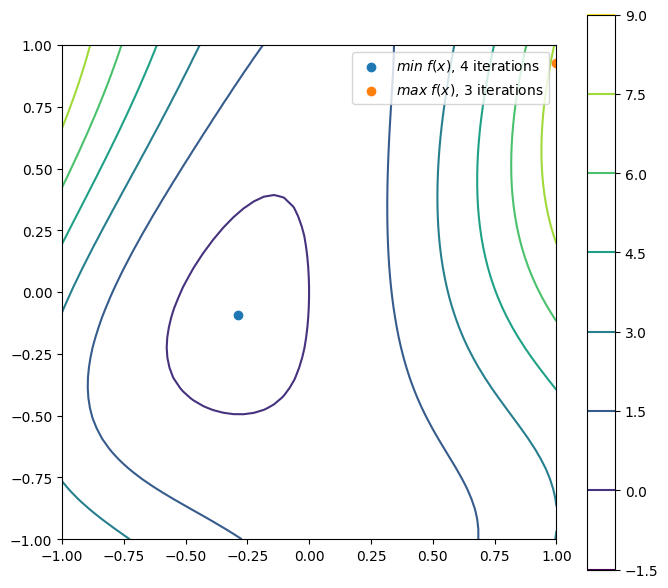

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def hessian(f, x,eps = 1e-6):
    dim = len(x)
    hess = np.zeros((dim, dim), dtype=np.double)
    for i in range(dim):
        i_d = np.zeros(dim)
        i_d[i] += eps
        for j in range(dim):
            j_d = np.zeros(dim)
            j_d[j] += eps
            hess[i, j] = (f(x - i_d - j_d) - f(x + i_d - j_d)- f(x - i_d + j_d) + f(x + i_d + j_d)) / (4 * eps ** 2)
    return hess


def point_in_area(point, bbox):
    return bbox[0][0] < point[0] < bbox[1][0]\
           and bbox[0][1] < point[1] < bbox[1][1]


def grad(f,x,eps = 1e-6):
    dim = len(x)
    grad_vector = np.zeros((dim, ), dtype=np.double)
    for i in range(dim):
        delta = np.zeros(dim)
        delta[i] += eps
        grad_vector[i] = (f(x + delta) - f(x - delta)) / (eps * 2)
    return grad_vector

def newton_optimize_vec(func,
                        bbox: tuple[np.array, np.array],
                        start: np.array,
                        eps: float = 1e-5,
                        minimize: bool = True) -> tuple[np.array, int]:
    x = start.astype(np.double)
    point_grad = grad(func, x)
    iter_cnt = 0
    while point_in_area(x, bbox) and np.linalg.norm(point_grad) > eps:
        step = np.linalg.inv(hessian(func, x)).dot(point_grad)
        x -= step if minimize else -step
        point_grad = grad(func, x)
        iter_cnt += 1
    x[0] = max(min(bbox[1][0], x[0]), bbox[0][0])
    x[1] = max(min(bbox[1][1], x[1]), bbox[0][1])
    return x, iter_cnt


def f(x):
    return 5* x[0] ** 2 + x[1] ** 2 + 3 * x[0] * np.cos(2*x[1]-x[0])


def ff(x, y):
    return 5*x ** 2 +  y ** 2 + 3 * x * np.cos(2*y-x)


bbox = (np.array([-1, -1]), np.array([1, 1]))

nx, ny = (50, 50)
x = np.linspace(bbox[0][0], bbox[1][0], nx)
y = np.linspace(bbox[0][1], bbox[1][1], ny)
xv, yv = np.meshgrid(x, y)
zv = ff(xv, yv)

plt.subplots(figsize=(7, 6))
cset = plt.contourf(x, y, zv)

print('Enter starting points in format < x y >:')
start = np.array(list(map(float, input().split())))
minima, iter_min = newton_optimize_vec(func=f, bbox=bbox, start=start,
                                       eps=1e-6, minimize=True)
maxima, iter_max = newton_optimize_vec(func=f, bbox=bbox, start=start,
                                       eps=1e-6, minimize=False)

fig, ax = plt.subplots(figsize=(7, 6))
cset = plt.contour(x, y, zv)
plt.axis('scaled')
plt.colorbar(cset)
plt.scatter(minima[0], minima[1],
            label=f'$min$ $f(x)$, {iter_min} iterations')
plt.scatter(maxima[0], maxima[1],
            label=f'$max$ $f(x)$, {iter_max} iterations')
plt.tight_layout()
plt.legend()

print("миниум: ", minima[0], minima[1])
print("максимум: ", maxima[0], maxima[1])

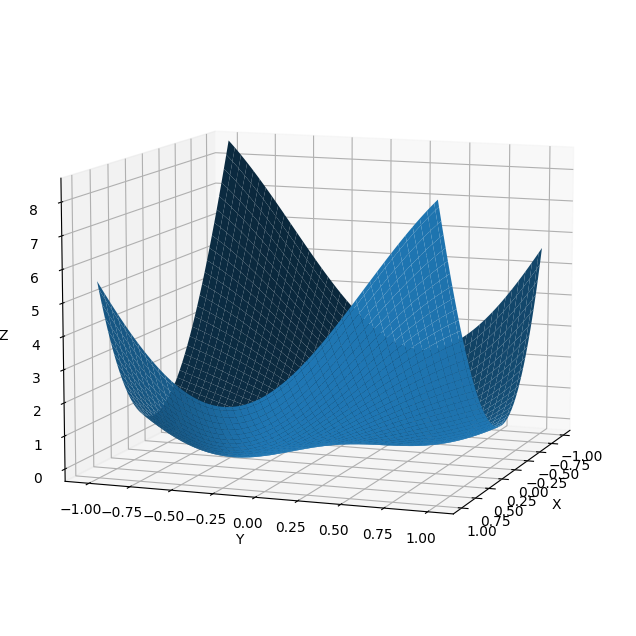

In [4]:
x1, x2 = -1.0, 1.0
y1, y2 = -1.0, 1.0

def fun(params):
  x, y = params
  return 5 * x**2 + y**2 + 3 * x * np.sin(2*y - x)

x_arr = np.linspace(x1, x2, 100)
y_arr = np.linspace(y1, y2, 100)
xgrid, ygrid = np.meshgrid(x_arr, y_arr)
z_arr = fun([xgrid, ygrid])


fig = plt.figure(figsize=(8, 8))

ax = plt.axes(projection ='3d')
ax.plot_surface(xgrid, ygrid, z_arr)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.view_init(10, 20)
plt.show()

KeyboardInterrupt: 

миниумм = [-3.  1.], 2, итераций
минимум =  -5.5


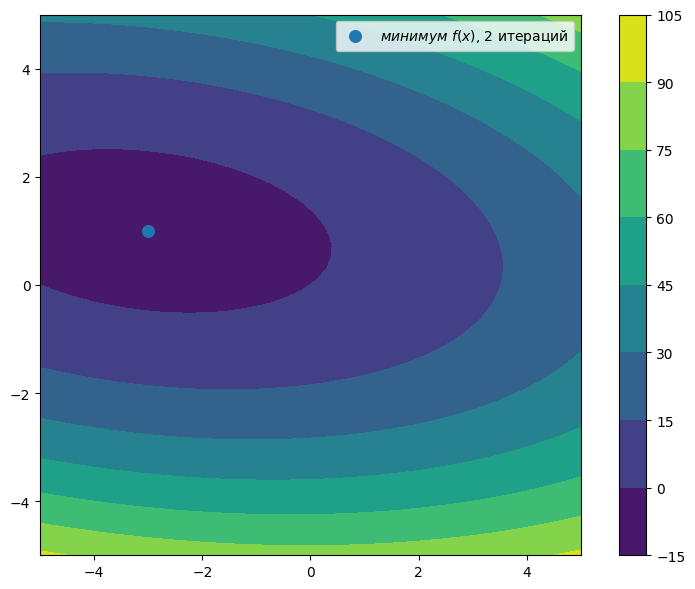

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from typing import Callable


def deriv(func: Callable[[float], float],
          point: float,
          eps: float = 1e-5) -> float:
    return (func(point + eps) - func(point - eps)) / (2 * eps)


def deriv2(func: Callable[[float], float],
           point: float,
           eps: float = 1e-5) -> float:
    return (func(point + eps) - 2 * func(point) + func(point - eps)) / (eps ** 2)


def grad(f: Callable[[np.array], np.array],
         x: np.array,
         eps: float = 1e-5) -> np.array:
    dim = len(x)
    grad_vector = np.zeros((dim, ), dtype=np.double)
    for i in range(dim):
        delta = np.zeros(dim)
        delta[i] += eps
        grad_vector[i] = (f(x + delta) - f(x - delta)) / (eps * 2)
    return grad_vector


def hessian(f: Callable[[np.array], np.array],
            x: np.array,
            eps: float = 1e-5) -> np.array:
    dim = len(x)
    hess = np.zeros((dim, dim), dtype=np.double)
    for i in range(dim):
        i_d = np.zeros(dim)
        i_d[i] += eps
        for j in range(dim):
            j_d = np.zeros(dim)
            j_d[j] += eps
            hess[i, j] = (f(x - i_d - j_d) - f(x + i_d - j_d)
                          - f(x - i_d + j_d) + f(x + i_d + j_d)
                          ) / (4 * eps ** 2)
    return hess


def point_in_area(point, bbox):
    return bbox[0][0] < point[0] < bbox[1][0]\
           and bbox[0][1] < point[1] < bbox[1][1]


def newton_optimize_vec(func: Callable[[np.array], np.array],
                        bbox: tuple[np.array, np.array],
                        start: np.array,
                        eps: float = 1e-5,
                        minimize: bool = True) -> tuple[np.array, int]:
    x = start.astype(np.double)
    point_grad = grad(func, x)
    iter_cnt = 0
    while point_in_area(x, bbox) and np.linalg.norm(point_grad) > eps:
        step = np.linalg.inv(hessian(func, x)).dot(point_grad)
        x -= step if minimize else -step
        point_grad = grad(func, x)
        iter_cnt += 1
    x[0] = max(min(bbox[1][0], x[0]), bbox[0][0])
    x[1] = max(min(bbox[1][1], x[1]), bbox[0][1])
    return x, iter_cnt


def conjucate_grad_minimize(func: Callable[[np.array], np.array],
                            start: np.array,
                            eps: float = 1e-5) -> tuple[np.array, int]:
    x = start.astype(np.double)
    x_prev, h_prev = None, None
    iter_cnt = 0
    h = -grad(func, x)
    while np.linalg.norm(grad(func, x)) > eps:
        h = -grad(func, x)
        if h_prev is not None and x_prev is not None:
            denominator = np.linalg.norm(grad(func, x_prev))
            beta = (np.linalg.norm(grad(func, x)) / denominator) ** 2
            h += beta * h_prev
        alpha, _ = newton_optimize_scal(lambda a: func(x + a * h),
                                        interval=(-5, 5),
                                        start=0,
                                        eps=eps * 1e-2)
        x_prev = x.copy()
        x += alpha * h
        h_prev = h.copy()
        iter_cnt += 1

    return x, iter_cnt


def conjucate_grad_quadratic_minimize(func: Callable[[np.array], np.array],
                                      func_matrix: np.array,
                                      start: np.array,
                                      eps: float = 1e-5) -> tuple[np.array, int]:
    x = start.astype(np.double)
    h_prev = None
    iter_cnt = 0
    h = -grad(func, x)
    while np.linalg.norm(grad(func, x)) > eps:
        h = -grad(func, x)
        if h_prev is not None:
            denominator = ((func_matrix @ h_prev) @ h_prev)
            beta = ((func_matrix @ h_prev) @ grad(func, x)) / denominator
            h += beta * h_prev
        alpha, _ = newton_optimize_scal(lambda a: func(x + a * h),
                                        interval=(-10, 10),
                                        start=0,
                                        eps=eps * 1e-2)
        x += alpha * h
        h_prev = h.copy()
        iter_cnt += 1

    return x, iter_cnt


def newton_optimize_scal(func: Callable,
                         interval: tuple[float, float],
                         start: float,
                         eps: float = 1e-5,
                         minimize: bool = True) -> tuple[float, int]:
    (a, b), x = interval, start
    cnt = 0
    while a <= x <= b and abs(deriv(func, x)) > eps:
        step = deriv(func, x) / deriv2(func, x)
        x += -step if minimize else step
        cnt += 1
    x = min(b, max(a, x))
    return x, cnt


def fibonacci(func: Callable,
              interval: tuple[float, float],
              eps: float = 1e-5,
              minimize: bool = True) -> tuple[float, int]:
    a, b = interval
    numbers, f = [1, 1], 2
    d = b - a
    while f <= (b - a) / eps:
        numbers.append(f)
        f = numbers[-1] + numbers[-2]
    n = len(numbers)
    for k in range(1, n):
        d *= numbers[n - k - 1] / numbers[n - k]
        x1 = b - d
        x2 = a + d
        cond = func(x1) <= func(x2) if minimize else func(x1) >= func(x2)
        if cond:
            b = x2
        else:
            a = x1
    return (a + b) / 2, n




def get_quad(A, b):

    def f_arr(x):
        return x @ A @ x + b @ x

    def f_var(x, y):
        return (A[0][0] * x ** 2
                + 2 * A[0][1] * x * y
                + A[1][1] * y ** 2
                + b[0] * x
                + b[1] * y)

    return f_arr, f_var


A = np.array([
    [0.5, 0.25],
    [0.25, 2.5]
])
b = np.array([2.5, -3.5])
start = np.array([0, 0])
f, ff = get_quad(A, b)

nx, ny = (50, 50)
x = np.linspace(-5, 5, nx)
y = np.linspace(-5, 5, ny)
xv, yv = np.meshgrid(x, y)
zv = ff(xv, yv)



minima, iter_min = conjucate_grad_minimize(func=f, start=start, eps=1e-6)
minima_q, iter_min_q = conjucate_grad_quadratic_minimize(func=f, func_matrix=A, start=start, eps=1e-6)
print(f'миниумм = {minima_q}, {iter_min_q}, итераций')
print("минимум = ", -5.5)
plt.subplots(figsize=(8, 6))
cset = plt.contourf(x, y, zv)
plt.scatter(minima[0], minima[1],
            s=70,
            label=f'$минимум$ $f(x)$, {iter_min} итераций')
plt.axis('scaled')
plt.colorbar(cset)
plt.tight_layout()
plt.legend()